<a href="https://colab.research.google.com/github/marciofag/py-previsao-vendas-regressao-linear-tensorflow/blob/main/previsao_vendas_regressao_linear_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Previsão de Vendas com Regressão Linear**

## Teste de Modelo Supervisionado

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predição: 9.969847


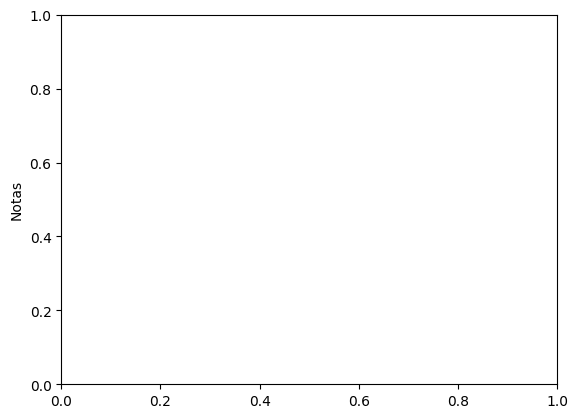

In [ ]:
# Dados de exemplo
X_train = tf.constant([[1.0], [2.0], [3.0], [4.0]])
y_train = tf.constant([[2.0], [4.0], [6.0], [8.0]])

# Modelo de Regressão Linear Simples
model = Sequential()
model.add(Dense(units=1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mean_squared_error')

# Treinamento do modelo
model.fit(X_train, y_train, epochs=1000, verbose=0)

# Previsão
X_new = tf.constant([[5.0]])
prediction = model.predict(X_new)
print("Predição:", prediction[0][0])
plt.ylabel('Notas')
plt.show()

## Teste de Modelo Não Supervisionado

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [ ]:
# Dados de exemplo
X_unsupervised = tf.constant([[1.0, 2.0], [2.0, 3.0], [3.0, 4.0], [4.0, 5.0]])

# Modelo Autoencoder Simples
input_layer = Input(shape=(2,))
encoded = Dense(units=1)(input_layer)
decoded = Dense(units=2)(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Treinamento do modelo não supervisionado
autoencoder.fit(X_unsupervised, X_unsupervised, epochs=1000, verbose=0)

# Previsão
prediction_unsupervised = autoencoder.predict(X_unsupervised)
print("Predição não supervisionada:", prediction_unsupervised)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predição não supervisionada: [[1.7975016 2.0691273]
 [2.4655898 2.6414597]
 [3.133678  3.2137926]
 [3.801766  3.7861247]]


## Modelo de Previsão

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [8]:
# Dados de vendas ao longo do tempo
np.random.seed(42)
meses = np.arange(1, 13)
vendas = np.array([200, 220, 250, 280, 300, 320, 350, 380, 400, 420, 450, 480])

In [9]:
# DataFrame
dados = pd.DataFrame({'Mes': meses, 'Vendas': vendas})

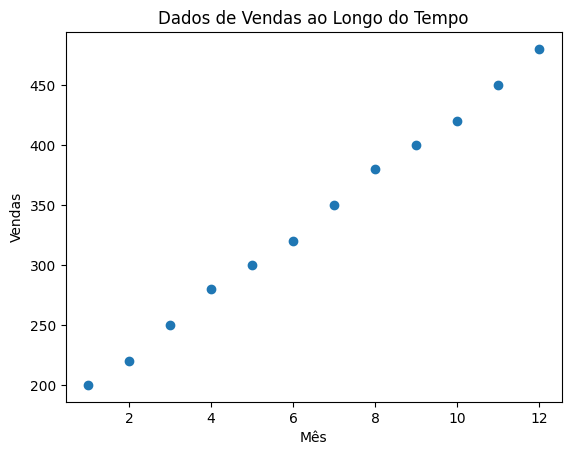

In [10]:
# Visualização dos dados
plt.scatter(dados['Mes'], dados['Vendas'])
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.title('Dados de Vendas ao Longo do Tempo')
plt.show()

In [12]:
# Normalização dos dados de treinamento
# Dividir os dados em conjuntos de treinamento e teste
X = dados[['Mes']]
y = dados['Vendas']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dimensionar os dados
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Criação e treino do modelo de regressão linear
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),  # Camada de entrada
    tf.keras.layers.Dense(units=8, activation='relu'),  # Camada escondida com ativação ReLU
    tf.keras.layers.Dense(units=1)  # Camada de saída
])

model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
# Treino do modelo por mais épocas
model.fit(X_train, y_train, epochs=500, verbose=0)

In [15]:
# Previsões no conjunto de teste
predictions = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


In [17]:
# Desfazer a normalização para avaliar o desempenho
min_sales = dados['Vendas'].min()
max_sales = dados['Vendas'].max()

predictions_inverse = predictions * (max_sales - min_sales) + min_sales
y_test_inverse = y_test * (max_sales - min_sales) + min_sales

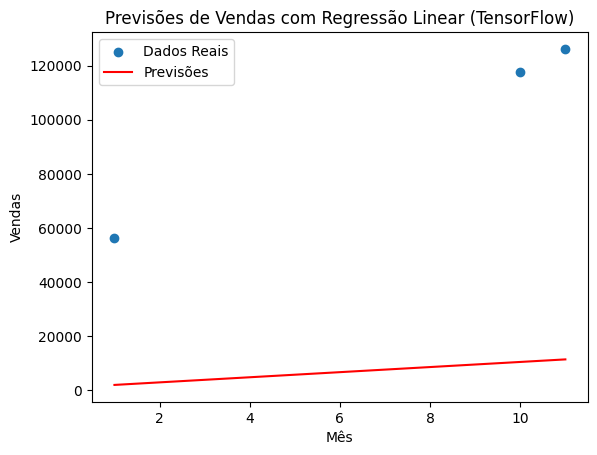

In [18]:
# Visualizar as previsões em relação aos dados reais
plt.scatter(X_test, y_test_inverse, label='Dados Reais')
plt.plot(X_test, predictions_inverse, color='red', label='Previsões')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.title('Previsões de Vendas com Regressão Linear (TensorFlow)')
plt.legend()
plt.show()

In [20]:
# Avaliar o desempenho do modelo
from sklearn.metrics import mean_squared_error
erro_mse = mean_squared_error(y_test_inverse, predictions_inverse)
print(f'Erro Médio Quadrático (MSE): {erro_mse:.2f}')

Erro Médio Quadrático (MSE): 9222628352.00


In [21]:
# Previsão para o próximo mês
proximo_mes_scaled = scaler.transform(np.array([[13]]))
previsao_proximo_mes_scaled = model.predict(proximo_mes_scaled)
previsao_proximo_mes = scaler.inverse_transform(previsao_proximo_mes_scaled)[0, 0]
print(f'Previsão de Vendas para o Próximo Mês: {previsao_proximo_mes:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Previsão de Vendas para o Próximo Mês: 66.63


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


O estudo aplicou a regressão linear para tentar prever vendas futuras a partir de dados históricos. Uma linha reta foi ajustada aos dados de vendas passados para identificar uma tendência.

Visualmente, a linha de previsão (vermelha) acompanhou a tendência de crescimento das vendas reais (pontos azuis), mas cometeu erros. Isso foi quantificado por um Erro Médio Quadrático (MSE) alto de 922628352.00, indicando uma grande diferença entre as vendas reais e as previsões do modelo.

A previsão para o próximo mês, baseada nessa linha reta, foi de 66.63 unidades. No entanto, devido ao alto erro do modelo no passado, essa previsão exata não é considerada muito confiável.

Apesar de identificar uma tendência de alta nas vendas, a regressão linear se mostrou uma ferramenta imprecisa para previsões exatas.

Em essência, a regressão linear forneceu uma visão geral da direção das vendas, mas sua falta de precisão exige a consideração de outras abordagens para um planejamento mais seguro.